<a href="https://colab.research.google.com/github/HomerTheChicken/PHYS3025Work/blob/main/Homework/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libs in no particular order
from astropy.table import Table
!pip install astroquery
import astroquery
from astroquery.vizier import Vizier
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors


In [2]:
# get data without empty values in the rows
v = Vizier(columns=['B-V', 'Vmag', 'Plx', 'e_Plx', 'SpType','Tc'],# also grab Tc for coloring, spectral class from 10-80
           column_filters={'Vmag': '!=','B-V': '!=','Plx': '!=','e_Plx': '!=','SpType': '!=', 'Tc':'!='}, row_limit=-1)
result = v.query_constraints(catalog='V/137D')
data_clean = result[0][result[0]['e_Plx']/result[0]['Plx']<0.05]  # keep rows with error less than 0.05: divide mas error by mas paralax then compare
data_clean = data_clean[data_clean['Plx']>0]                      # keep rows with positive paralax
data_clean = data_clean[data_clean['B-V']<2]                      # keep rows with colors that aren't too red (removes outliers)
print(data_clean[data_clean['Tc']<10]['Tc'])

 Tc
---


In [3]:
# perform calculations, name stuff for easy reference
BVColor = data_clean['B-V']
Vmag = data_clean['Vmag']
distance = 1/data_clean['Plx']*10**3                              # d = 1/angle, converted to as from mas
M_v = Vmag - 5*np.log10(distance)+5                               # distance modulus eqn


Text(0, 0.5, 'Absolute visual magnitude')

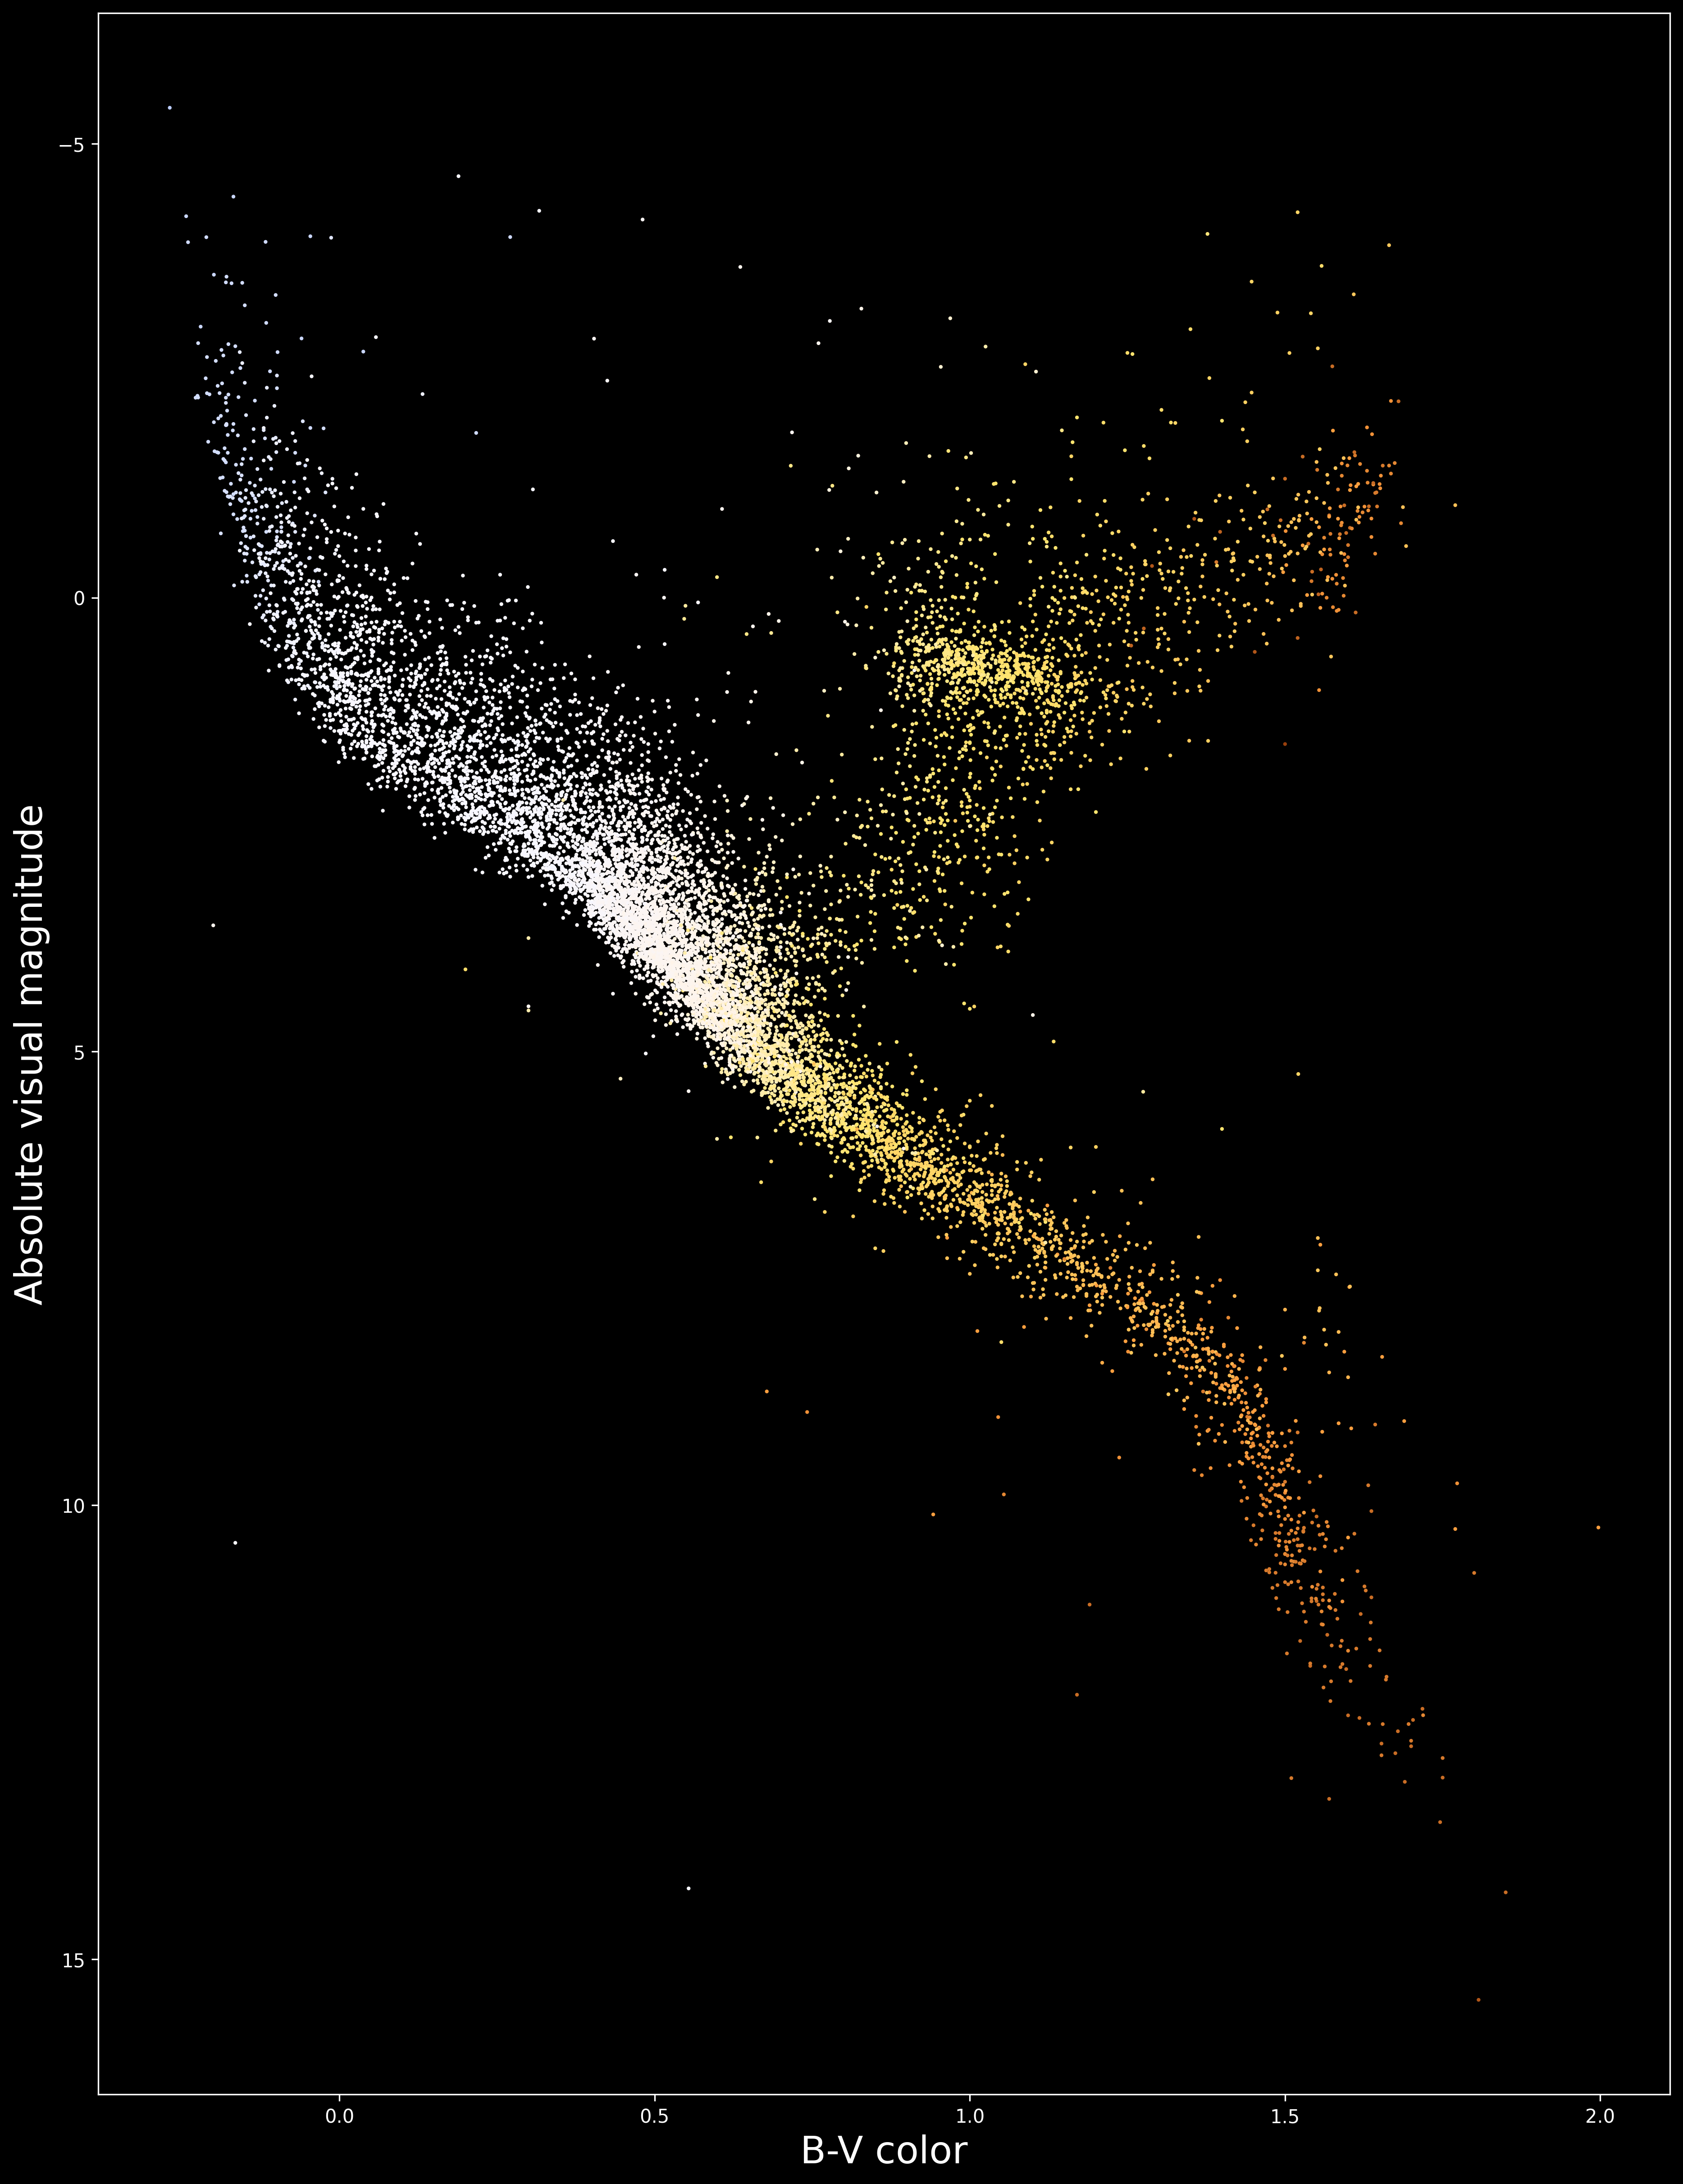

In [5]:
# styling after the plot given in class (90% faked)
colors = ['#aabfff', "#cad7ff","#f8f7ff","#f7f7ff","#fff4ea","#ffe46f","#ffa040","#802800"]
fakecolors = matplotlib.colors.LinearSegmentedColormap.from_list('fakecolors',colors)
matplotlib.colormaps.register(fakecolors)
norm = plt.Normalize(10,80)
plt.style.use('dark_background')
plt.figure(figsize=(15, 20), dpi=300)

# make a scatter plot for our HR diagram
plt.scatter(BVColor, M_v, s=1, norm=norm, c=data_clean['Tc'], cmap='fakecolors')
plt.ylim(reversed(plt.ylim()))
plt.xlabel("B-V color", fontsize=20)
plt.ylabel("Absolute visual magnitude", fontsize=20)

In order to convert this into a luminosity vs temperature chart we'd have to use a bolometric magnitude instead of just a visual one to calculate the luminosity, whereas as long as there isn't much extinction we could directly convert from  B-V color to temperature. Then it's a direct swap for the magnitude and color axes. That's if we didn't want to pull directly from the catalog. If we wanted the plots to look similar we'd need to plot log luminosity or else everything will be compressed into the bottom half of the graph.